# Resource Optimized Neural Architecture Search for 3D Medical Image Segmentation

## Abstract 

- What is Network Achitecture Search(NAS)? 
    - Neural Networks의 최적화 되어진 모델을 찾아주는 프레임워크 

- 많은 Natural image 분야에서 사용되어지고 있음. 

- Medical + 3D Segmentaion에 연구는 안되어지고 있음.
    - 시간과 computational cost가 너무 크다 

- Small cost, 3D medical에 대한 해결을 제한 

## Related work

- Why need NAS?
    - 성능이 최적화된 Network를 찾기 위해서는 hyperparameters를 변경해가며 실험을 해야한다.
    - 연구자가 반복적인 실험은 비효율적이기 때문에 자동적으로 최적의 parameter를 찾는 방법을 연구했고 그게 Automated Machine Learning (AutoML)
    - autoML에서 최적인 network를 만들어주는 방법인 Neural Architecture Search(NAS)로 발전 

- Search Space(검색공간)
    - Architecture에 영향을 받는 변수에 대한 정의

- Search Strategy(검색 전략)
    - 검색공간을 탐색하는 방법으로 빠르게 찾는 방안이 제안이됨.

- Performance Estimation Strategy(성능 추적 전략)
    - 측정하고자 하는 데이터에 대해 높은 성능을 달성하는 전략
    - 시간이 오래 걸림으로 단축이 필요 


- Efficient Neural Architecture Search via Parameter Sharing 
- 많은 연산량을 줄이는데 초점을 맞췄다.
    - 일반적으로 RNN을 이용한 Controller를 사용하지만 자원이 많이 소비됨.
    - 치명적인 이유중 하나는 학습되었던 child model weight를 버리기 때문임. 

- 저자는 child model를 서로 공유하도록 만들었음. 
    - 그림에 있는 바와 같이 subgroup 즉 child model끼리 연결되어있음.

- Designing Convolutional Networks 
    - 어떤 노드를 연결 ? 
    - 어떤 computation operation을 연결 ?

    - 후보군 생성 
    - 3x3 or 5x5 conv filters
    - 3x3 or 5x5 depthwise-separable conv filters
    - Average or max pooling with 3x3 kernal size

- Scalable Neural Architecture Search for 3D Medical Image Segmentation (SCNAS)

- 3D medical image NAS의 처음 적용한 논문 
    - 최적화 속도를 위해서 아래와같은 방법 제안 
    - stochastic sampling algorithm 
    - Gumbel-Softmax relaxation
    - ![Screenshot from 2024-02-19 21-42-34.png](<attachment:Screenshot from 2024-02-19 21-42-34.png>)
    - Encoder, decoder, reduction, expansion으로 구성되어있음.

    
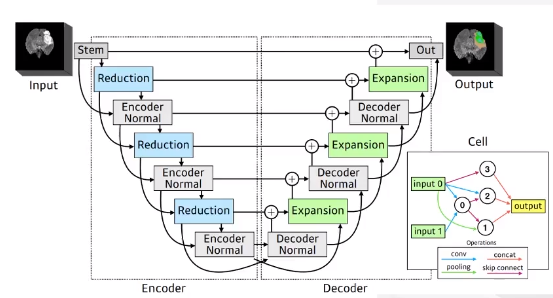

## Method 

![Screenshot from 2024-02-19 22-05-00.png](<attachment:Screenshot from 2024-02-19 22-05-00.png>)

- Proposed Searching Space 
    - RNN base controller를 사용
    - 다른 spacing의 사용을 다르게 접근함.
    - anisotropic(이방성) 이미지 특성 사용 : 
    4x155x240x240 , 1x[90~130]x320x320, 2x[11~24]x[256~384]x[256~384]
    - receptive field 확장을 위해 Dilation rate, pooling을 포함.
    - Memory의 사용을 줄이기 위해서 Micro Search를 적용


- Unet에 들어있는 Skip connection의 경우 add를 사용하여 memory를 줄임

- Depth-wise convolution을 이용 

- Model에 들어가는 input의 경우 height(H), width(W) and depth(D)로 설정하여 stride(S)를 결정한다. 

- ![Screenshot from 2024-02-19 22-08-40.png](<attachment:Screenshot from 2024-02-19 22-08-40.png>)

- Proposed base Architecture 

- Skip connection되는 부분을 1x1x1 convolution으로 변경 

- ![Screenshot from 2024-02-19 22-10-07.png](<attachment:Screenshot from 2024-02-19 22-10-07.png>)

- ENAS(Efficient Neural Architecture Search via Parameter Sharing) 방법론을 적용 

- NAS가 반복하는 모든 Search Space를 하나의 Directed Acyclic Graph(DAG, 유향 비순환 그래프)로 나타내어서 접근 
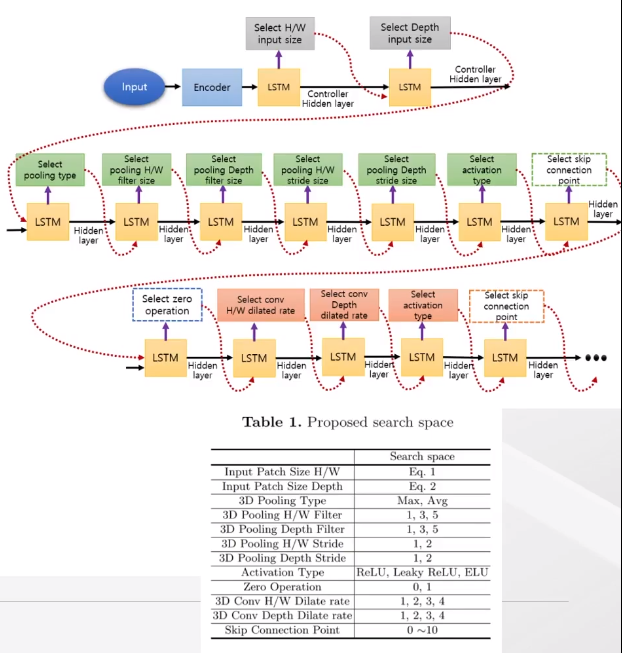
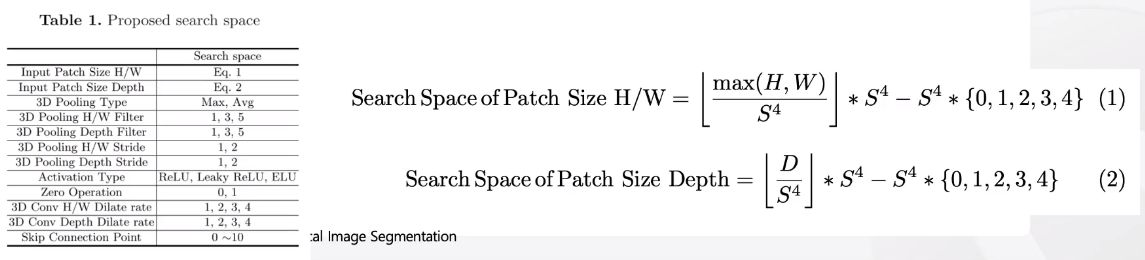
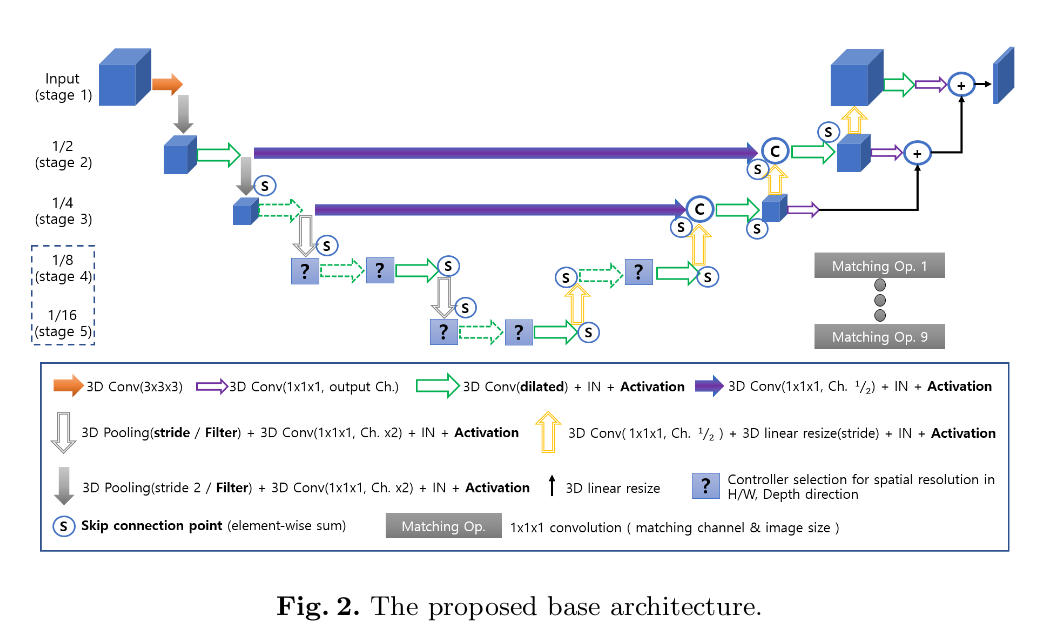

## Experiment 

- 3D shape, channel size가 영상마다 모두 다르기 때문에 다양한 데이터셋에서 검증이 필요 

- decathlon challenge dataset 사용 
    - brain, heart, prostate image

- 5-fold cross validation evalution 사용 

- Z-score normalization
    - Image의 mean과 std가 각각 0,1이 되도록 변환 

## Result 

- Scalable neural architecture search for 3d medical image (SCNAS) & nnUnet과 비교한 결과

- GPU와 TTA의 사용 유무를 제외하더라도 더 좋은 성능을 달성 
    - 앙상블 없이 단일 네트워크로 SOTA 달성 
    - Patching 기법을 사용하지 않음. 

- Entropy와 각 task마다 reward를 추적한 결과 entropy 증가와 reward가 잘 되어지고 있음을 볼 수 있음. 

- Network 구조가 optimal 하게 만들어짐을 볼 수 있음. 